In [1]:
from MLClasses import subject_postgres_corpus

D:\Programe\Anaconda3\envs\MachineLearning\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


connecting to PostgreSQL database...


connection established
PostgreSQL 10.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit


In [3]:
mm_corpus = gensim.corpora.MmCorpus('./gensim_data/politicai_bow.mm')
print(mm_corpus)

MmCorpus(928 documents, 61216 features, 622724 non-zero entries)


NameError: name 'politicAiCorpus' is not defined

In [4]:
from gensim.models import KeyedVectors
dutch_model = KeyedVectors.load('./word2vec-pretrained/gensim.dutch')


In [5]:
# Initialize WmdSimilarity.
from gensim.similarities import WmdSimilarity
num_best = 10
instance = WmdSimilarity(dutch_model.vocab, dutch_model, num_best=10 )

[]
Wall time: 9min 7s


D:\Programe\Anaconda3\envs\MachineLearning\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\Programe\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
D:\Programe\Anaconda3\envs\MachineLearning\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Programe\Anaconda3\envs\MachineLearning\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be 

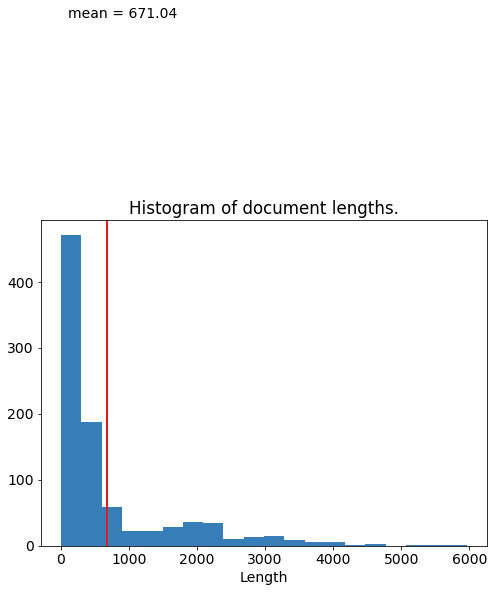

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

# Document lengths.
lens = [len(doc) for doc in mm_corpus]

# Plot.
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=14)
plt.rc('lines', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))
# Histogram.
plt.hist(lens, bins=20)
plt.hold(True)
# Average length.
avg_len = sum(lens) / float(len(lens))
plt.axvline(avg_len, color='#e41a1c')
plt.hold(False)
plt.title('Histogram of document lengths.')
plt.xlabel('Length')
plt.text(100, 800, 'mean = %.2f' % avg_len)
plt.show()

In [18]:
print((mm_corpus.__iter__().__next__()))

[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0), (15, 1.0), (16, 1.0), (17, 1.0)]


In [9]:

sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()

sentence_obama = [w for w in sentence_obama]
sentence_president = [w for w in sentence_president]

In [19]:
from utility.document_streaming import *
documentStreaming = PostgresStreaming()
documents = documentStreaming.iter_tokenize_statements()
dutch_model.wmdistance(documents.__next__(), documents.__next__())

connecting to PostgreSQL database...


connection established
PostgreSQL 10.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit
100
Tokenized 0 statements


1.077435244122314

In [22]:
dutch_model.wmdistance(documents.__next__(), documents.__next__())

KeyboardInterrupt: 

In [44]:
print(mm_corpus.__dict__.values())

dict_values([array([     97,     214,    3848,    8892,   39725,   40011,   57178,
         60808,   78419,   93374,   95867,   98887,  114363,  118800,
        118877,  121299,  139023,  143521,  156230,  156513,  159768,
        159854,  165299,  181474,  184876,  185171,  185469,  191967,
        199850,  200086,  200478,  200709,  201043,  201111,  224933,
        225162,  248517,  251859,  262057,  262314,  284410,  326391,
        329863,  330010,  333954,  336640,  336756,  337216,  337330,
        337535,  337604,  337909,  342114,  342478,  349729,  369111,
        372982,  381159,  404424,  421338,  434240,  434498,  438075,
        448809,  468155,  474383,  494436,  501948,  502693,  502907,
        511275,  511758,  514783,  514888,  515003,  515187,  521321,
        521626,  563818,  567356,  588159,  593238,  593661,  593918,
        596658,  619979,  639273,  643029,  670135,  670273,  674364,
        677834,  684619,  689034,  689294,  689580,  690073,  690392,
       

In [33]:
gensim.similarities.MatrixSimilarity(mm_corpus,)